## Predictive Analysis on Purchase Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)


In [3]:
# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix='Segment', prefix_sep='_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis=1)

df_pa = df_purchase_predictors

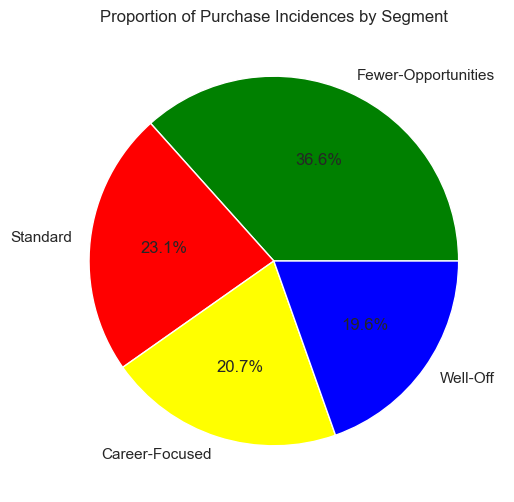

In [4]:
segment_counts = df_pa['Segment'].value_counts(normalize=True)
segment_names = ['Fewer-Opportunities', 'Standard', 'Career-Focused', 'Well-Off']
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_names, autopct='%1.1f%%', colors=['green', 'red', 'yellow', 'blue'])
plt.title('Proportion of Purchase Incidences by Segment')
plt.show()


In [5]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X, Y)

# The coefficient for price is negative, indicating that as price increases, purchase probability decreases
print(model_purchase.coef_)

[[-2.3480023]]


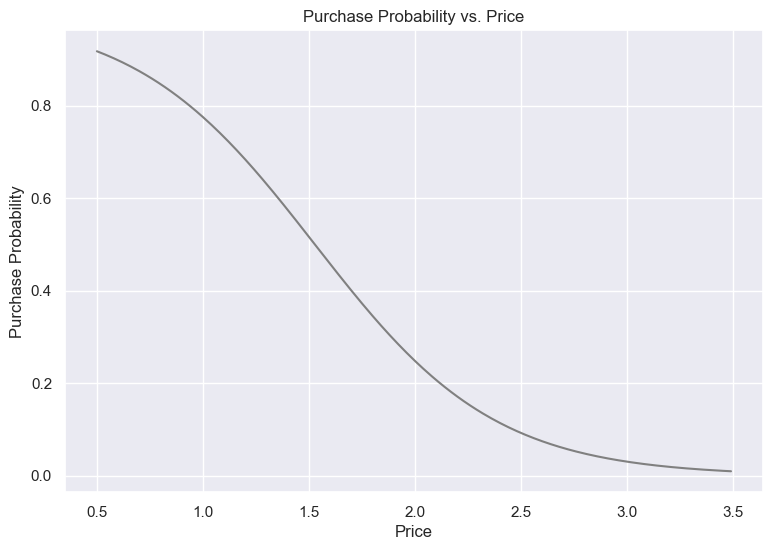

In [6]:
price_range = np.arange(0.5, 3.5, 0.01)
df_price_range = pd.DataFrame(price_range, columns=['Mean_Price'])
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, purchase_pr, color='grey')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price')
plt.show()

[[-3.63984754]]


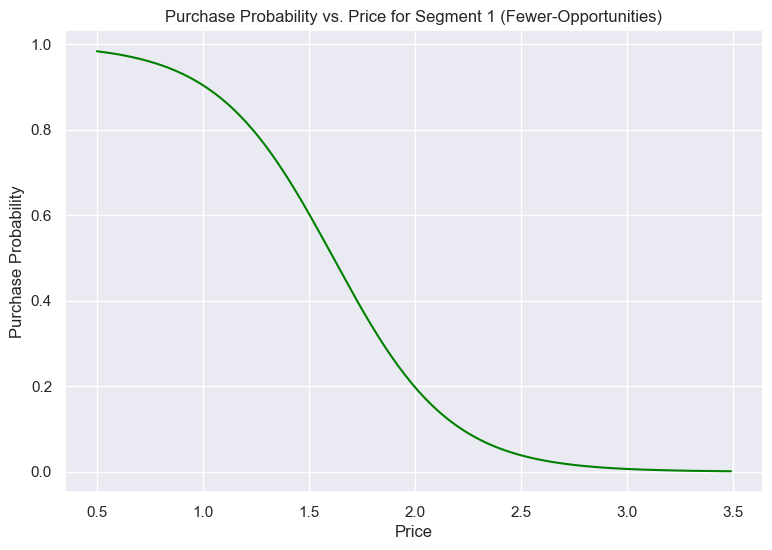

In [7]:
# Purchase Probability by Segments
# Segment 1 - Fewer-Opportunities
df_pa_segment_1 = df_pa[df_pa['Segment'] == 0]
Y = df_pa_segment_1['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5
model_incidence_segment_1 = LogisticRegression(solver='sag')
model_incidence_segment_1.fit(X, Y)
print(model_incidence_segment_1.coef_)
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, purchase_pr_segment_1, color='green')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price for Segment 1 (Fewer-Opportunities)')
plt.show()

[[-1.50843644]]


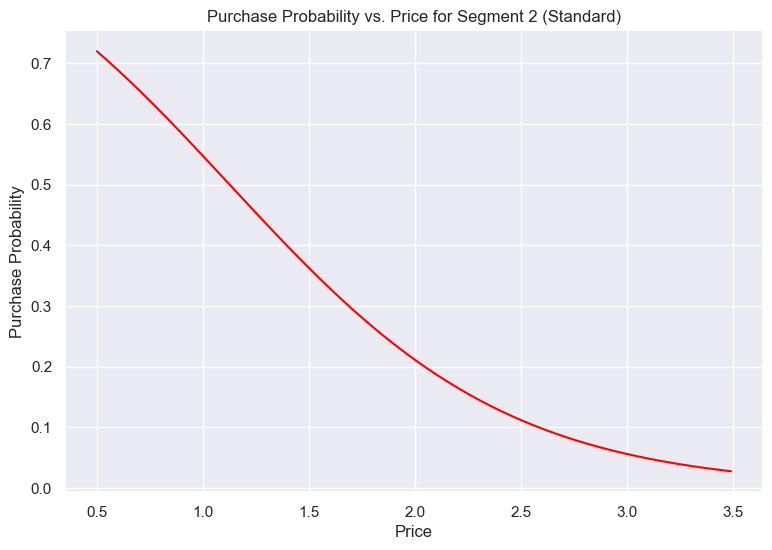

In [8]:
# Segment 2 - Standard
df_pa_segment_2 = df_pa[df_pa['Segment'] == 1]
Y = df_pa_segment_2['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] +
                   df_pa_segment_2['Price_5']) / 5
model_incidence_segment2 = LogisticRegression(solver='sag')
model_incidence_segment2.fit(X, Y)
print(model_incidence_segment2.coef_)

# Visualize purchase probability for Segment 2
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, purchase_pr_segment_2, color='red')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price for Segment 2 (Standard)')
plt.show()

[[-1.71184401]]


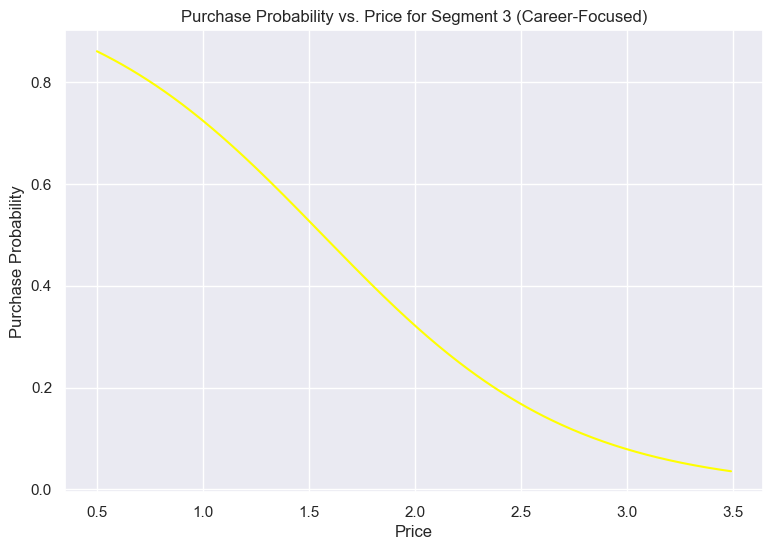

In [9]:
# Segment 3 - Career-Focused
df_pa_segment_3 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_segment_3['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] +
                   df_pa_segment_3['Price_5']) / 5
model_incidence_segment3 = LogisticRegression(solver='sag')
model_incidence_segment3.fit(X, Y)
print(model_incidence_segment3.coef_)

# Visualize purchase probability for Segment 3
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_3[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, purchase_pr_segment_3, color='yellow')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price for Segment 3 (Career-Focused)')
plt.show()

[[-1.24714799]]


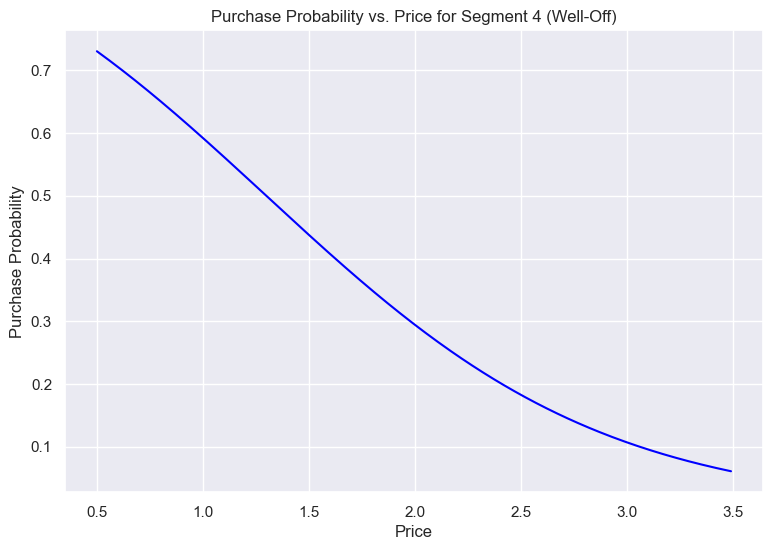

In [10]:
df_pa_segment_4 = df_pa[df_pa['Segment'] == 3]
Y = df_pa_segment_4['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_4['Price_1'] +
                   df_pa_segment_4['Price_2'] +
                   df_pa_segment_4['Price_3'] +
                   df_pa_segment_4['Price_4'] +
                   df_pa_segment_4['Price_5']) / 5
model_incidence_segment4 = LogisticRegression(solver='sag')
model_incidence_segment4.fit(X, Y)
print(model_incidence_segment4.coef_)

# Visualize purchase probability for Segment 4
Y_segment_4 = model_incidence_segment4.predict_proba(df_price_range)
purchase_pr_segment_4 = Y_segment_4[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, purchase_pr_segment_4, color='blue')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price for Segment 4 (Well-Off)')
plt.show()

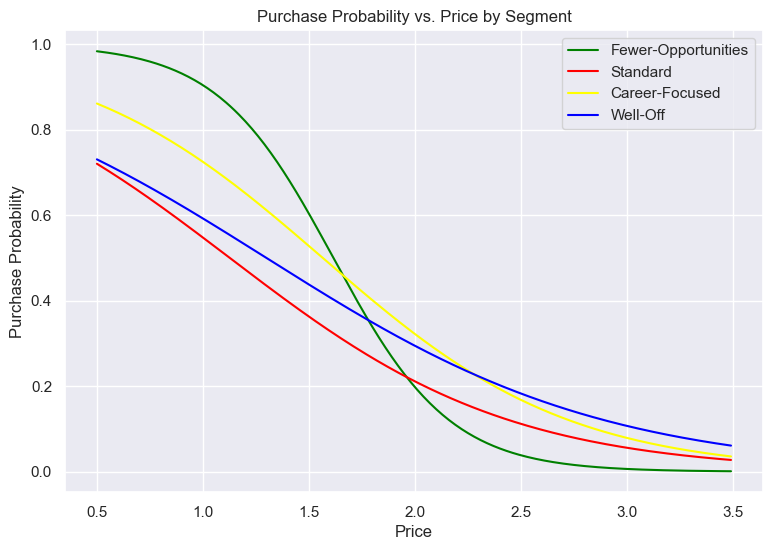

In [11]:
# Combined purchase probability plot for all segments
segment_models = [model_incidence_segment_1, model_incidence_segment2, model_incidence_segment3, model_incidence_segment4]
segment_names = ['Fewer-Opportunities', 'Standard', 'Career-Focused', 'Well-Off']
colors = ['green', 'red', 'yellow', 'blue']
plt.figure(figsize=(9, 6))
for i, model in enumerate(segment_models):
    Y_segment = model.predict_proba(df_price_range)
    purchase_pr_segment = Y_segment[:, 1]
    plt.plot(price_range, purchase_pr_segment, label=segment_names[i], color=colors[i])
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price by Segment')
plt.legend()
plt.show()

In [12]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5
X['Promotion'] = (df_pa['Promotion_1'] +
                  df_pa['Promotion_2'] +
                  df_pa['Promotion_3'] +
                  df_pa['Promotion_4'] +
                  df_pa['Promotion_5']) / 5
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, Y)
print(model_incidence_promotion.coef_)

[[-1.49407139  0.56154775]]


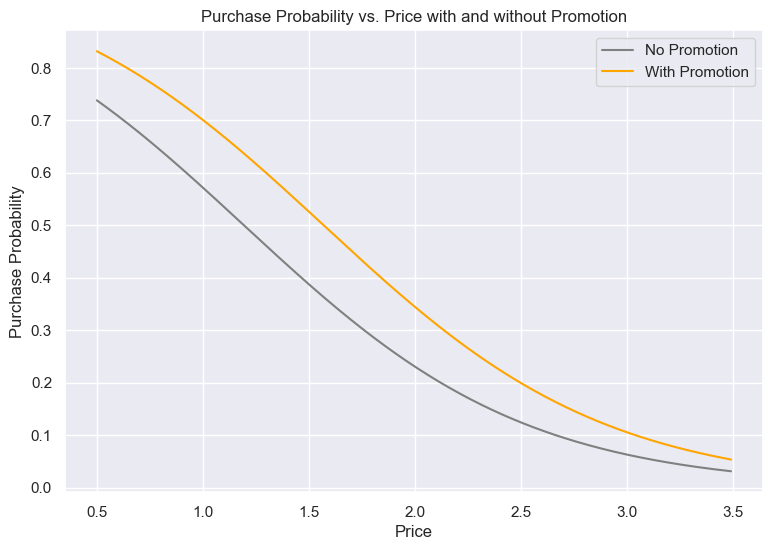

In [13]:
# Visualize purchase probability with and without promotion
df_price_range_promo0 = pd.DataFrame(price_range, columns=['Mean_Price'])
df_price_range_promo0['Promotion'] = 0
Y_promo0 = model_incidence_promotion.predict_proba(df_price_range_promo0)[:, 1]
df_price_range_promo1 = pd.DataFrame(price_range, columns=['Mean_Price'])
df_price_range_promo1['Promotion'] = 1
Y_promo1 = model_incidence_promotion.predict_proba(df_price_range_promo1)[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(price_range, Y_promo0, label='No Promotion', color='grey')
plt.plot(price_range, Y_promo1, label='With Promotion', color='orange')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability vs. Price with and without Promotion')
plt.legend()
plt.show()

In [14]:
brand_choice = df_pa[df_pa['Incidence'] == 1]
Y = brand_choice['Brand']
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]
model_brand_choice = LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X, Y)
with open('brand_choice_model.pickle', 'wb') as file:
    pickle.dump(model_brand_choice, file)
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
print(bc_coef)

D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


        Coef_Brand_1 Coef_Brand_2 Coef_Brand_3 Coef_Brand_4 Coef_Brand_5
Price_1        -3.92         1.27         1.62         0.57         0.44
Price_2         0.66        -1.88         0.56         0.40         0.26
Price_3         2.42        -0.21         0.50        -1.40        -1.31
Price_4         0.70        -0.21         1.04        -1.25        -0.29
Price_5        -0.20         0.59         0.45         0.25        -1.09


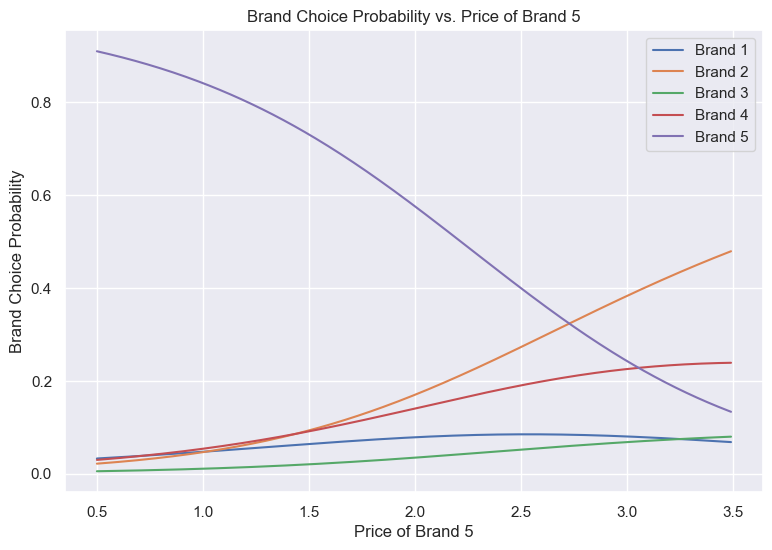

In [15]:
# Visualize brand choice probabilities vs. Price_5
df_brand_choice_plot = pd.DataFrame(index=np.arange(price_range.size))
df_brand_choice_plot['Price_1'] = brand_choice['Price_1'].mean()
df_brand_choice_plot['Price_2'] = brand_choice['Price_2'].mean()
df_brand_choice_plot['Price_3'] = brand_choice['Price_3'].mean()
df_brand_choice_plot['Price_4'] = brand_choice['Price_4'].mean()
df_brand_choice_plot['Price_5'] = price_range
predict_brand_choice = model_brand_choice.predict_proba(df_brand_choice_plot)
plt.figure(figsize=(9, 6))
for i in range(5):
    plt.plot(price_range, predict_brand_choice[:, i], label=f'Brand {i+1}')
plt.xlabel('Price of Brand 5')
plt.ylabel('Brand Choice Probability')
plt.title('Brand Choice Probability vs. Price of Brand 5')
plt.legend()
plt.show()